# Titanic- Data Science Project
## Template for Exploratory Data Analysis(EDA)

https://github.com/ShuaiW/ml-cheatsheet \
https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/ \
https://medium.com/swlh/exploratory-data-analysis-eda-from-scratch-in-python-8c12c2673aa7

## Loading the data and other imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [144]:
#Evaluation metrics
import gc
import os
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

A few things we need to do before we dive into predictions:
- Check the missing values
- Removing duplicates
- Check the outlier
- Data Visualization
- Imbalanced data
- Encoding Categorical variables
- Multicollinearity
- Normalizing and Scaling

<AxesSubplot:xlabel='Survived', ylabel='count'>

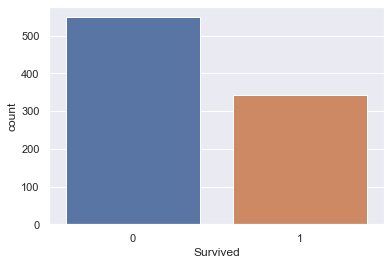

In [32]:
sns.countplot(x='Survived', data= train_df)

### Handling missing value

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
null_train = (train_df.isnull().sum(axis = 0)/len(train_df)) \
                .sort_values(ascending=False)
null_train

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [64]:
null_test= (test_df.isnull().sum(axis = 0)/len(test_df)) \
                .sort_values(ascending=False)
null_test

Cabin          0.782297
Age            0.205742
Fare           0.002392
Embarked       0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

drop columns

In [12]:
# train_df.dropna()
# df.drop([col1, col2, ...], axis=1, inplace=True) # in place
# new_df = df.drop([col1, col2, ...], axis=1) # create new df (overhead created)

replace using median, mean

In [13]:
train_df_mode, train_df_mean, train_df_median = train_df.mode().iloc[0], train_df.mean(), train_df.median()

In [18]:
## Method 1:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(np.nan, 'mean')
# train_df['Age'] = imputer.fit_transform(np.array(train_df['Age']).reshape(891, 1)) # 1st

replace using predictions

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

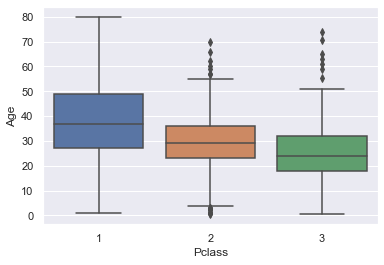

In [19]:
sns.boxplot(x ='Pclass', y='Age', data= train_df)

In [34]:
mean_age_P1 = train_df[train_df['Pclass'] == 1]['Age'].mean()
mean_age_P2 = train_df[train_df['Pclass'] == 2]['Age'].mean()
mean_age_P3 = train_df[train_df['Pclass'] == 3]['Age'].mean()
print(mean_age_P1, mean_age_P2, mean_age_P3)

38.233440860215055 29.87763005780347 25.14061971830986


In [35]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [36]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

In [66]:
mean_age_P1 = test_df[test_df['Pclass'] == 1]['Age'].mean()
mean_age_P2 = test_df[test_df['Pclass'] == 2]['Age'].mean()
mean_age_P3 = test_df[test_df['Pclass'] == 3]['Age'].mean()
print(mean_age_P1, mean_age_P2, mean_age_P3)

40.91836734693877 28.7775 24.02794520547945


In [67]:
def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 41

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [68]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age1,axis=1)

Drop the passengerid, name and cabin data

In [38]:
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace= True)

In [39]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [69]:
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace= True)

In [43]:
null_train = (train_df.isnull().sum(axis = 0)/len(train_df)) \
                .sort_values(ascending=False)
null_train

Embarked    0.002245
Fare        0.000000
Ticket      0.000000
Parch       0.000000
SibSp       0.000000
Age         0.000000
Sex         0.000000
Pclass      0.000000
Survived    0.000000
dtype: float64

In [49]:
mode_1 = train_df['Embarked'].mode().values[0]
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, mode_1)

In [50]:
null_train = (train_df.isnull().sum(axis = 0)/len(train_df)) \
                .sort_values(ascending=False)
null_train

Embarked    0.0
Fare        0.0
Ticket      0.0
Parch       0.0
SibSp       0.0
Age         0.0
Sex         0.0
Pclass      0.0
Survived    0.0
dtype: float64

In [70]:
null_train = (test_df.isnull().sum(axis = 0)/len(test_df)) \
                .sort_values(ascending=False)
null_train

Fare        0.002392
Embarked    0.000000
Ticket      0.000000
Parch       0.000000
SibSp       0.000000
Age         0.000000
Sex         0.000000
Pclass      0.000000
dtype: float64

In [71]:
mode_2 = train_df['Fare'].mode().values[0]
train_df['Fare'] = train_df['Fare'].replace(np.nan, mode_2)

### Handling Duplicate records

In [61]:
duplicate = train_df.duplicated()
print(train_df.duplicated().sum())
train_df[duplicate]

0


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [62]:
train_df.drop_duplicates(inplace=True)

In [63]:
test_df.duplicated().sum()

0

### Handling Outlier

In [80]:
#Discover and visualize the data to gain insights
print('Variable', '   ', 'count of unique value','  ', 'content')
for column in train_df.columns:
    uniques = sorted(train_df[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

Variable     count of unique value    content
Survived                 2	 [0, 1]
Pclass                   3	 [1, 2, 3]
Sex                      2	 ['female', 'male']
Age                     88	 [0.42, 0.67, 0.75, 0.83, 0.92]
SibSp                    7	 [0, 1, 2, 3, 4]
Parch                    7	 [0, 1, 2, 3, 4]
Ticket                 681	 ['110152', '110413', '110465', '110564', '110813']
Fare                   248	 [0.0, 4.0125, 5.0, 6.2375, 6.4375]
Embarked                 3	 ['C', 'Q', 'S']


In [81]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,0.383562,2.301370,29.347511,0.474886,0.372146,32.035354
std,0.486531,0.837983,13.280394,0.946843,0.801912,49.975363
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.427100
75%,1.000000,3.000000,37.000000,1.000000,0.000000,30.548950
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

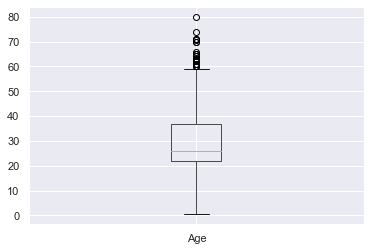

In [87]:
train_df.boxplot(column=['Age'])

###  Imbalanced data

In [90]:
sum(train_df['Survived'])/len(train_df)

0.3835616438356164

In [91]:
from sklearn.utils import resample
data_majority = train_df[train_df.Survived==0]
data_minority = train_df[train_df.Survived==1]
 
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     
                                 n_samples=len(data_majority),   
                                 random_state=123) 
 
train_df = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
train_df.Survived.value_counts()

1    540
0    540
Name: Survived, dtype: int64

### Data Visualization
Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4.Swarm plot

Two Categorcal Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

<AxesSubplot:xlabel='Survived', ylabel='count'>

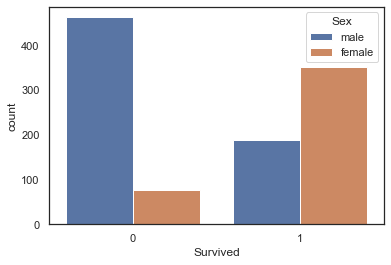

In [92]:
sns.countplot(x='Survived', hue='Sex', data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

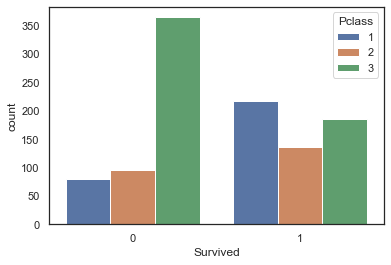

In [93]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

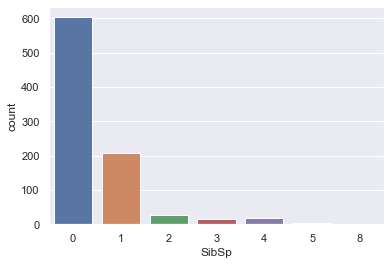

In [74]:
sns.countplot(x='SibSp',data=train_df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

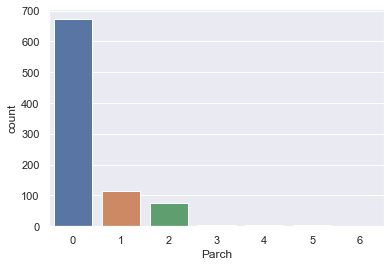

In [75]:
sns.countplot(x='Parch',data=train_df)

<AxesSubplot:>

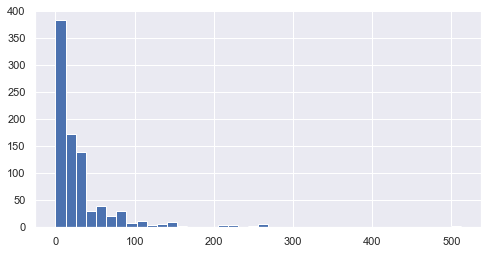

In [76]:
train_df['Fare'].hist(bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Survived', ylabel='count'>

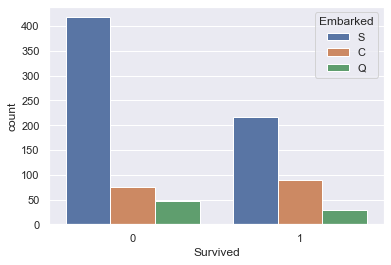

In [77]:
sns.countplot(x='Survived', hue='Embarked', data=train_df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

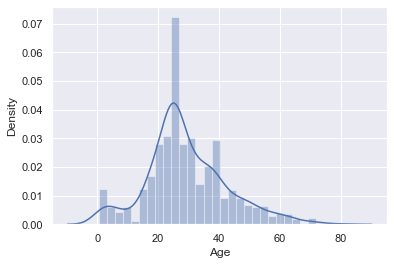

In [78]:
sns.distplot(train_df['Age'], bins=30)

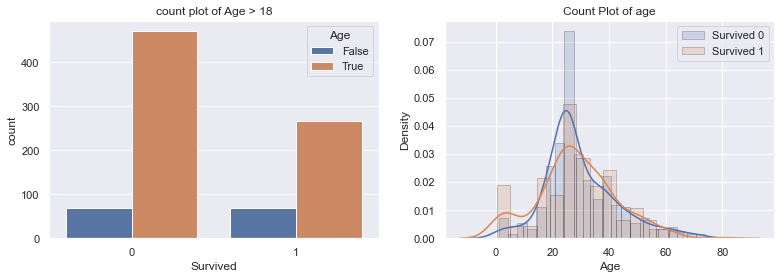

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,4))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

sns.countplot(train_df['Survived'],hue=train_df['Age']>18,ax=ax[0])
ax[0].set_title('count plot of Age > 18')
con_0 = train_df[train_df['Survived']==0]['Age']
con_1 = train_df[train_df['Survived']==1]['Age']

sns.distplot(con_0,label='Survived 0', ax=ax[1],hist_kws=hist_kws)
sns.distplot(con_1,label='Survived 1', ax=ax[1],hist_kws=hist_kws)

ax[1].legend()
ax[1].set_title('Count Plot of age',fontsize=12);

### Categorical Variables and Dummy Variables

#### Method 1

In [97]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [98]:
train_df.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [99]:
train_df = pd.concat([train_df,sex,embark],axis=1)

In [100]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1


Method 2

Encode target labels with value between 0 and (n_classes - 1).

In [101]:
objects_cols = test_df.select_dtypes("object").columns
objects_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df[objects_cols] = train_df[objects_cols].apply(le.fit_transform)
test_df[objects_cols] = test_df[objects_cols].apply(le.fit_transform)
test_df.head()

KeyError: "None of [Index(['Sex', 'Ticket', 'Embarked'], dtype='object')] are in the [columns]"

### Multicollinearity

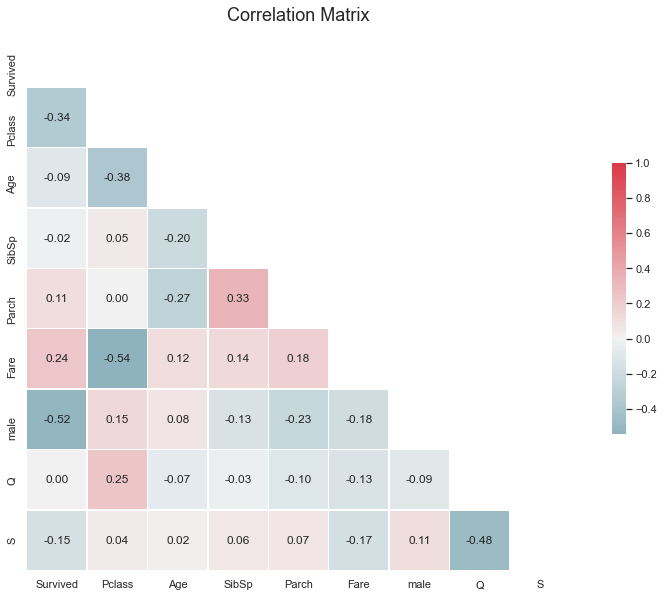

In [105]:
sns.set(style="white")

corr = train_df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,fmt = '.2f',square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Building a model

In [107]:
# Machine Learning 
X = train_df.drop(['Survived'], 1).values
y = train_df['Survived'].values

### Splitting the dataset into the Training set and Test set

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [111]:
yhat = LR_model.predict(X_test)

In [117]:
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(accuracy_score(y_test,yhat))

[[142  30]
 [ 32 120]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       172
           1       0.80      0.79      0.79       152

    accuracy                           0.81       324
   macro avg       0.81      0.81      0.81       324
weighted avg       0.81      0.81      0.81       324

0.808641975308642


In [113]:
def metrics(true, preds): 
    """
    Function to calculate evaluation metrics
    parameters: true values, predictions
    prints accuracy, recall, precision and f1 scores
    """
    accuracy = accuracy_score(true, preds)
    recall = recall_score(true, preds, average = 'weighted')
    precision = precision_score(true, preds, average = 'weighted')
    f1score = f1_score(true, preds, average = 'weighted')
    print ('accuracy: {}, recall: {}, precision: {}, f1-score: {}'.format(accuracy, recall, precision, f1score))

In [116]:
metrics(y_test,yhat)

accuracy: 0.808641975308642, recall: 0.808641975308642, precision: 0.8085426422591174, f1-score: 0.8085613973401238, cr：<function classification_report at 0x000001EEDC896B80>


<AxesSubplot:>

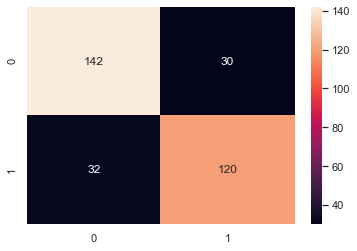

In [114]:
cm = confusion_matrix(y_test,yhat)
sns.heatmap(cm, annot=True, fmt='d')

<ipython-input-115-919a39315f39>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


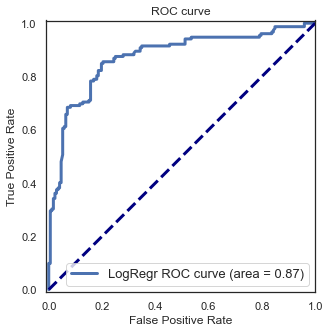

In [115]:
y_predict_lr_prop= LR_model.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr_prop[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (8,5))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curve', fontsize=12)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [119]:
yhat = DT_model.predict(X_test)

In [120]:
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(accuracy_score(y_test,yhat))

[[149  23]
 [ 25 127]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       172
           1       0.85      0.84      0.84       152

    accuracy                           0.85       324
   macro avg       0.85      0.85      0.85       324
weighted avg       0.85      0.85      0.85       324

0.8518518518518519


<ipython-input-121-919a39315f39>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


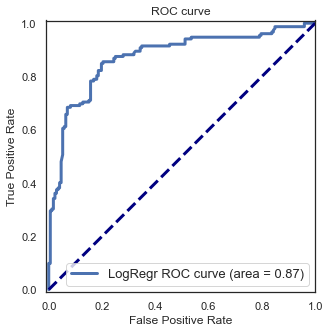

In [121]:
y_predict_lr_prop= LR_model.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr_prop[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize = (8,5))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curve', fontsize=12)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
clf = RandomForestClassifier(n_estimators= 50)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [124]:
yhat = clf.predict(X_test)

In [125]:
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(accuracy_score(y_test,yhat))

[[135  37]
 [  7 145]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       172
           1       0.80      0.95      0.87       152

    accuracy                           0.86       324
   macro avg       0.87      0.87      0.86       324
weighted avg       0.88      0.86      0.86       324

0.8641975308641975


In [126]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
max_depth = [int(x) for x in np.linspace(50, 300, num = 5)]
max_depth.append(None)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth
              }

In [127]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   56.4s finished


Wall time: 57.7 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [50, 112, 175, 237, 300,
                                                      None],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=42, verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 325, 'max_depth': 112}

In [129]:
clf = RandomForestClassifier(n_estimators= 325, max_depth=112)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=112, n_estimators=325)

In [130]:
yhat = clf.predict(X_test)

In [131]:
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(accuracy_score(y_test,yhat))

[[136  36]
 [  6 146]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       172
           1       0.80      0.96      0.87       152

    accuracy                           0.87       324
   macro avg       0.88      0.88      0.87       324
weighted avg       0.88      0.87      0.87       324

0.8703703703703703


In [132]:
metrics(y_test,yhat)

accuracy: 0.8703703703703703, recall: 0.8703703703703703, precision: 0.884773025618096, f1-score: 0.8699995620930822, cr：<function classification_report at 0x000001EEDC896B80>


In [142]:
"""
feat_importances = pd.DataFrame({"name":X_train.columns,"coef":model.feature_importances_})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances
"""

'\nfeat_importances = pd.DataFrame({"name":X_train.columns,"coef":model.feature_importances_})\nfeat_importances = feat_importances[[\'name\',\'coef\']]# reorder the columns\nfeat_importances[\'importances\'] = np.abs( feat_importances[\'coef\'] )\nfeat_importances.sort_values(by="importances",inplace=True,ascending=False)\nfeat_importances\n'

In [155]:
from numpy import loadtxt
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [135]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [136]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()
xgboost = GridSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, verbose=2, random_state=42, n_jobs = -1)

xgboost.fit(X_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [145]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2


In [146]:
test_df.Fare.fillna(method='ffill', inplace=True)

In [147]:
sex = pd.get_dummies(test_df['Sex'],drop_first=True)
embark = pd.get_dummies(test_df['Embarked'],drop_first=True)
test_df.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)
test_df = pd.concat([test_df,sex,embark],axis=1)

In [148]:
test_X = test_df.values
test_X = sc.transform(test_X)

In [153]:
rfc_pre = clf.predict(test_X)
dtree_pre = DT_model.predict(test_X)
lr_pre = LR_model.predict(test_X)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1]


In [150]:
sum_pred = rfc_pre + dtree_pre + lr_pre  
max_pred = np.where(sum_pred > 0, 1, 0)
min_pred = np.where(sum_pred > 0, 0, 1)

In [151]:
sub = pd.read_csv('gender_submission.csv')

In [152]:
sub.head()
sub.to_csv('submission.csv', index=False)
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [154]:
sub['Survived'] = rfc_pre
sub.to_csv('rfc_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
